# House Prices 

Primero debemos importar las librerias que usaremos para realizar el análisis

In [138]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


Posteriormente procedemos a cargar la base de datos proporcionada, la cual esta divida en tres CSVs. 

  1) __train.csv:__ Es el conjunto de entrenamiento de los datos. Siendo aproximadamente el 50% de los datos (1460 de 2919 datos). 

  2) __test.csv:__ Es el conjunto de pruebas de los datos. Siendo aproximadamente el 50% de los datos (1459 de 2919 datos).

  3) __sample_submission.csv:__ Este archivo contiene la respuesta de una regresion lineal multiple realizada usando las siguiente caracteristicas: año y mes de venta, pies cuadrados del lote y número de dormitorios.


In [139]:
TrainingData = pd.read_csv('train.csv')
TestData = pd.read_csv('test.csv')
SampleSubmissionData = pd.read_csv('sample_submission.csv')

TrainingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
TestData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [141]:
SampleSubmissionData.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Lo primero que debemos verificar es que las características del conjunto de datos tengan descripción en el archivo 'data_description.txt'. Esto se hizo de manera manual obteniendo las siguientes observaciones:

-) La columnumna __'BedroomAbvGr'__ se encuentra como __'Bedroom'__ en la descripción.

-) La columna __'KitchenAbvGr'__ se encuentra como __'Kitchen'__ en la descripción.

-) El archivo no contiene una descripción para la columna __'Id'__, por ende, se entenderá esta columna como identificador único de ahora en adelante para este análisis.

posteriormente, debemos verificar que tanto los datos de entrenamiento como los datos de pruebas contengan las mismas características. Por otro lado, y según la lógica de una regresión deberíamos tener en los datos de entrenamiento una característica que debería ser la que tomemos como independiente. Es decir, los datos de entrenamiento deberían diferir de los datos de prueba por una columna (que para poder realizar el análisis solicitado debería ser el precio de la vivienda).

Para verificar que los datos contengan las mismas características en este caso miraremos que las columnas sean las mismas. es así, como realizaremos lo siguiente:

In [142]:
len(set(TrainingData.columns).intersection(set(TestData.columns)))

80

Obteniendo de esta manera las 80 características iguales (Todas) en ambos conjuntos de datos. Ahora, para encontrar la característica en la que difieren, hacemos lo siguiente:

In [143]:
set(TrainingData.columns) - set(TestData.columns)

{'SalePrice'}

Con lo que podemos concluir que los datos suministrados son válidos para comenzar con el análisis.

Ahora realizaremos un analisis de los datos, empezando por el tema mas importante y es el hecho de los NAs. Para ello verificaremos el porcentaje de NAs en cada columna de ambos conjuntos de datos como sigue:

# Training Data

In [144]:
TrainDataRowNumber = len(TrainingData)

NullTrainData = pd.DataFrame(TrainingData.isnull().sum(axis = 0))
NullTrainData = NullTrainData.apply(lambda x: x/TrainDataRowNumber)
NullTrainData = NullTrainData[NullTrainData[0] > 0].T
NullTrainData

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,0.177397,0.937671,0.005479,0.005479,0.025342,0.025342,0.026027,0.025342,0.026027,0.000685,0.472603,0.055479,0.055479,0.055479,0.055479,0.055479,0.995205,0.807534,0.963014


Posteriormente, analizamos los posibles cambios que se pueden hacer a cada categoría como sigue:

### Posibles Cambios:

  - __Alley:__ 1369 NAs Posible crear una categoría 'NAA' (No alley access).

  - __BsmtQual:__ 37 NAs Posible crear una categoría de 0 que lleve un 'NB' (No Basement).

  - __Fence:__ 1179 NAs Posible crear una categoría de 'NF' (No Fence).

  - __GarageType:__ 81 NAs Posible crear una categoría de 'NG' (No Garage).

  - __MiscFeature:__ 1406 NAs Posible crear una categoría de 'None'.

  - __PoolQC:__ 1453 NAs, __Esta característica se debería eliminar puesto que no se encuentra en un 99% y no hay manera de deducirla. Es decir, no aporta nada a este análisis.__

### No se pueden Cambiar:

  - __LotFrontage:__ 259 NAs, Posible pensar que es 0, pero nada lo asegura.

  - __MasVnrType:__ 8 NAs, No es posible deducir de que tipo es.

  - __MasVnrArea:__ 8 NAs, No es posible deducir cual es el área. Parece que no miraron esta característica en esas 8 casas 

  - __BsmtCond:__ 37 NAs, No es posible deducir la condición del sótano.

  - __BsmtExposure:__ 38 NAs, parece que no miraron esta característica para 1 casa.

  - __BsmtFinType1:__ 37 NAs.

  - __BsmtFinType2:__ 38 NAs, parece que no miraron esta característica para 1 casa (Distinta a la anterior).

  - __Electrical:__ 1 NA, No es posible deducir que tipo de electricidad hay en la casa.

  - __FireplaceQu:__ 690 NAs.

  - __GarageYrBlt:__ 81 NAs, No se puede deducir el año en el que se construyó el garage.

  - __GarageFinish:__ 81 NAs, No se puede deducir como está el interior del garage.

  - __GarageQual:__ 81 NAs, No se puede deducir la calidad del garage.

  - __GarageCond:__ 81 NAs, No se puede deducir la condición del garage.

Para realizar este análisis se utilizó el archivo 'data_description.txt' y el siguiente código:

In [145]:
#TrainData['ColumnName'].isnull().sum()

Para finalizar, realizamos los cambios teniendo mucho cuidado de que los mismo cambios que se hagan en la base de entrenamiento, tambien se deben hacer en la base de pruebas.

In [146]:
TrainingData.Alley = TrainingData.Alley.replace(np.nan, 'NAA')
TrainingData.BsmtQual = TrainingData.BsmtQual.replace(np.nan, 'NB')
TrainingData.Fence = TrainingData.Fence.replace(np.nan, 'NF')
TrainingData.GarageType = TrainingData.GarageType.replace(np.nan, 'NG')
TrainingData.MiscFeature = TrainingData.MiscFeature.replace(np.nan, 'None')
if "PoolQC" in TrainingData :
    TrainingData = TrainingData.drop(columns=['PoolQC'])

# Test Data

In [147]:
TestDataRowNumber = len(TestData)

NullTestData = pd.DataFrame(TestData.isnull().sum(axis = 0))
NullTestData = NullTestData.apply(lambda x: x/TestDataRowNumber)
NullTestData = NullTestData[NullTestData[0] > 0].T
NullTestData

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,0.002742,0.155586,0.926662,0.001371,0.000685,0.000685,0.010966,0.010281,0.030158,0.030843,...,0.053461,0.053461,0.000685,0.000685,0.053461,0.053461,0.997944,0.801234,0.965045,0.000685


Posteriormente, analizamos los posibles cambios que se pueden hacer a cada categoría como sigue:

### Posibles Cambios:

  - __Alley:__ 1352 NAs Posible Cambiarlo a un 'NAA' Para finalizar, realizamos los cambios teniendo mucho cuidado de que los mismo cambios que se hagan en la base de entrenamiento, tambien se deben hacer en la pase de pruebas.(No alley access).

  - __BsmtQual:__ 44 NAs Posible crear una categoría de 0 que lleve un 'NB' (No Basement).

  - __Fence:__ 1169 NAs Posible crear una categoria de 'NF' (No Fence).

  - __Functional:__ 2 NAs Posible cambiarlo por 'Typ' (Typical Functionality) debido a la descripción.

  - __GarageType:__ 76 NAs Posible crear una categoría de 'NG' (No Garage)

  - __MiscFeature:__ 1408 NAs Posible crear una categoria de 'None'.

  - __PoolQC:__ 1453 NAs, __Esta característica se debería eliminar puesto que no se encuentra en un 99% y no hay manera de deducirla. Es decir, no aporta nada a este análisis.__

  - __BsmtFinType1:__ 42 NAs, Existe una __preocupación__ en el hecho de que existirían 2 casas sin sotano, que tienen esta clasificación. (Posibles errores). Lo que podemos pensar en hacer es en eliminar esos dos registros.

  - __BsmtFinType2:__ 42 NAs, Existe una __preocupación__ en el hecho de que existirían 2 casas sin sotano, que tienen esta clasificación. (Posibles errores). Lo que podemos pensar en hacer es en eliminar esos dos registros.

  - __BsmtFullBath:__ 2 NAs, __Se podria__ cambiar por 0 si la casa es la que no tiene sotano.

  - __BsmtHalfBath:__ 2 NAs, __Se podria__ cambiar por 0 si la casa es la que no tiene sotano.

### No se pueden Cambiar:

  - __MSZoning:__ 4 NAs, No es posible deducir la zona de venta (Puede hacerce usando ArcGis o QGis, pero aun asi se necesitaria una ubicación)

  - __LotFrontage:__ 227 NAs, Posible pensar que es 0, pero nada lo asegura.

  - __Utilities:__ 2 NAs. 

  - __Exterior1st:__ 1 NA, No es posible deducir el material.

  - __Exterior2nd:__ 1 NA, No es posible deducir el material.

  - __MasVnrType:__ 16 NAs, No es posible deducir de que tipo es.

  - __MasVnrArea:__ 15 NAs, No es posible deducir cual es el area. Existe una casa a la que le midieron el area pero no el tipo.

  - __BsmtCond:__ 45 NAs, No es posible deducir la condicion del sotano.

  - __BsmtExposure:__ 44 NAs.

  - __BsmtFinSF1:__ 1 NA.

  - __BsmtFinSF2:__ 1 NA.

  - __BsmtUnfSF:__ 1 NA.

  - __TotalBsmtSF:__ 1 NA.

  - __KitchenQual:__ 1 NAs.

  - __FireplaceQu:__ 730 NAs.

  - __GarageYrBlt:__ 78 NAs, No se puede deducir el año en el que se construyo el garage.

  - __GarageFinish:__ 78 NAs, No se puede deducir como esta el interior del garage.

  - __GarageCars:__ 1 NA. Aunque si pensamos en un tamaño por defecto de automovil y sabemos el are adel garage este valor se puede llenar.

  - __GarageArea:__ 1 NA. 

  - __GarageQual:__ 78 NAs, No se puede deducir la calidad del garage.

  - __GarageCond:__ 78 NAs, No se puede deducir la condicion del garage.

  - __SaleType:__ 1 NA.

Para realizar este análisis se utilizó el archivo 'data_description.txt' y el siguiente código

In [148]:
#TestData['ColumnName'].isnull().sum()

Para finalizar, realizamos los cambios teniendo mucho cuidado de que los mismo cambios que se hagan en la base de entrenamiento, tambien se deben hacer en la base de pruebas.

In [149]:
TestData.Alley = TestData.Alley.replace(np.nan, 'NAA')
TestData.BsmtQual = TestData.BsmtQual.replace(np.nan, 'NB')
TestData.Fence = TestData.Fence.replace(np.nan, 'NF')
TestData.Functional = TestData.Functional.replace(np.nan, 'Typ')
TestData.GarageType = TestData.GarageType.replace(np.nan, 'NG')
TestData.MiscFeature = TestData.MiscFeature.replace(np.nan, 'None')

if "PoolQC" in TestData :
    TestData = TestData.drop(columns=['PoolQC'])

# Se eliminan las filas expuestas anteriormente (Queda comentado como una posible solución)
#TestData = TestData.drop(TestData[(TestData.BsmtQual == 'NB') & (TestData.BsmtFinType1.notna())].index)
#TestData = TestData.drop(TestData[(TestData.BsmtQual == 'NB') & (TestData.BsmtFinType2.notna())].index)

#Con esta linea nos damos cuenta de que no tiene sotano las filas que tienen el NAs en 'BsmtFullBath'
#TestData[(TestData.BsmtQual == 'NB') & (TestData.BsmtFullBath.isnull())].BsmtFullBath 
#Con esta linea nos damos cuenta de que no tiene sotano las filas que tienen el NAs en 'BsmtHalfBath'
#TestData[(TestData.BsmtQual == 'NB') & (TestData.BsmtHalfBath.isnull())].BsmtHalfBath

# Esto se hace para poder realizar la regresión (No sabria si eliminar la fila o solo colocar el area en 0)
TestData.TotalBsmtSF = TestData.TotalBsmtSF.replace(np.nan, 0)
TestData.GarageArea = TestData.GarageArea.replace(np.nan, 0)

TestData.BsmtFullBath = TestData.BsmtFullBath.replace(np.nan, 0)
TestData.BsmtHalfBath = TestData.BsmtHalfBath.replace(np.nan, 0)

# Análisis del conjunto de datos

Primero verificaremos que el conjunto de datos que tenemos funcione para realizar la regresión propuesta por Kaggle.

In [150]:
linear_model = LinearRegression(normalize=True)
TrainingTest = TrainingData[['MoSold','YrSold','LotArea','BedroomAbvGr']]
Testtest = TestData[['MoSold','YrSold','LotArea','BedroomAbvGr']]
linear_model.fit(TrainingTest,TrainingData['SalePrice'])

PredictData = {'Id':TestData.Id, 
               'MoSold':TestData.MoSold,
               'YrSold':TestData.YrSold,
               'LotArea':TestData.LotArea,
               'BedroomAbvGr':TestData.BedroomAbvGr, 
               'SalePrice': linear_model.predict(Testtest)}
PredictData = pd.DataFrame(PredictData)

PredictData.SalePrice= PredictData.SalePrice.apply(lambda x: round(x, 2))
SampleSubmissionData.SalePrice= SampleSubmissionData.SalePrice.apply(lambda x: round(x, 2))
PredictData['Comparison'] = np.where(PredictData["SalePrice"] == SampleSubmissionData["SalePrice"], True, False)
PredictData.Comparison.sum()


1459

Obteniendo de esta manera un 100% de aciertos. Junto con la siguiente predicción.

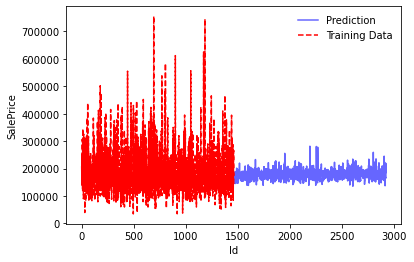

In [151]:
plt.plot(PredictData.Id, PredictData.SalePrice,'b',alpha=0.6, label='Prediction')
plt.plot(TrainingData.Id,TrainingData.SalePrice,'r--', label='Training Data')
plt.legend(loc='best', frameon=False)
plt.xlabel('Id')
plt.ylabel('SalePrice')
plt.show()

De acuerdo a la descripción de los datos que proporciona Kaggle y los análisis realizados con anterioridad hay 79 variables a considerar. Sin embargo, se han tomado un pequeño grupo de ellas dividido en dos tipos, variables numéricas y variables categóricas, para predecir los precios de venta. Estas son:

## Variables Numéricas:

  - __MSSubClass:__ El tipo de vivienda involucrada en la venta. 
  - __1stFlrSF:__ Área del primer piso en Pies cuadrados.
  - __2ndFlrSF:__ Área del segundo piso en Pies cuadrados.
  - __PoolArea:__ Área de la piscina en pies cuadrados.
  - __GarageArea:__ Área del garaje en pies cuadrados.
  - __TotalBsmtSF:__ Área del sótano en pues cuadrados
  - __OverallCond:__ Valora el estado general de la casa.
  - __YearBuilt:__ Fecha de construcción original.
  - __YearRemodAdd:__ Fecha de remodelación.
  - __BedroomAbvGr:__ Cantidad de habitaciones.
  - __FullBath:__ Cantidad de baños.
  - __KitchenAbvGr:__ Cantidad de cocinas.
  
## Variables Categóricas:

  - __MSZoning:__ La clasificación de zonificación general de la venta.
  - __Utilities:__ Tipo de servicios disponibles.
  - __Neighborhood:__ Ubicación dentro de los límites de la ciudad de Ames.
  
  
Estas características fueron seleccionadas porque describen la vivienda de forma general.

Ahora estas características se pueden simplificar de la siguiente manera:

In [152]:
# Supongo que hay una relación porque el año de remodelación es el mismo que el de la construcción cuando no hay remodelación
correlationMatrix = TrainingData[['YearBuilt','YearRemodAdd']].corr()
correlationMatrix

,YearBuilt,YearRemodAdd
YearBuilt,1.000000,0.592855
YearRemodAdd,0.592855,1.000000


Como muestra la matriz los años están muy correlacionados, luego podemos usar el año de remodelación para describir la característica.

In [153]:
# la suma de todas las áreas de la casa.
TrainingData['HouseTotalArea'] = TrainingData['1stFlrSF'] + TrainingData['2ndFlrSF'] + TrainingData.PoolArea + TrainingData.GarageArea + TrainingData.TotalBsmtSF

correlationMatrix = TrainingData[['1stFlrSF','2ndFlrSF','PoolArea','GarageArea','TotalBsmtSF','HouseTotalArea']].corr()
correlationMatrix

,1stFlrSF,2ndFlrSF,PoolArea,GarageArea,TotalBsmtSF,HouseTotalArea
1stFlrSF,1.000000,-0.202646,0.131525,0.489782,0.819530,0.794720
2ndFlrSF,-0.202646,1.000000,0.081487,0.138347,-0.174512,0.325567
PoolArea,0.131525,0.081487,1.000000,0.061047,0.126053,0.201819
GarageArea,0.489782,0.138347,0.061047,1.000000,0.486665,0.703447
TotalBsmtSF,0.819530,-0.174512,0.126053,0.486665,1.000000,0.816254
HouseTotalArea,0.794720,0.325567,0.201819,0.703447,0.816254,1.000000


Como muestra la matriz el valor de las áreas queda descrito en su mayoría por la suma de todas ellas.

In [154]:
TrainingData['HouseTotalRooms'] = TrainingData.BedroomAbvGr + TrainingData.FullBath + TrainingData.KitchenAbvGr

correlationMatrix = TrainingData[['BedroomAbvGr','FullBath','KitchenAbvGr', 'HouseTotalRooms']].corr()
correlationMatrix

,BedroomAbvGr,FullBath,KitchenAbvGr,HouseTotalRooms
BedroomAbvGr,1.000000,0.363252,0.198597,0.880675
FullBath,0.363252,1.000000,0.133115,0.728519
KitchenAbvGr,0.198597,0.133115,1.000000,0.378716
HouseTotalRooms,0.880675,0.728519,0.378716,1.000000


Como muestra la matriz el valor de las habitaciones queda descrito en su mayoría por la suma de las habitaciones.

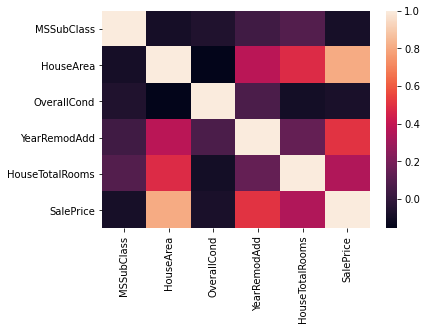

In [155]:
#Por otro lado, para poder usar las variables categóricas debemos pasarlas a variables numéricas. 
# y como no sabemos si hay alguna variable que pese más que otra, 
# podemos usar una metodología llamada 'One-Hot Encoding' como sigue: (Posible Camino para mejorar 
# el modelo)

#Zone = pd.get_dummies(TrainingData.MSZoning, prefix='Zone')
#Utility = pd.get_dummies(TrainingData.Utilities, prefix='Utility')
#Neighborhood = pd.get_dummies(TrainingData.Neighborhood, prefix='Neighborhood')

MyTrainingData = pd.DataFrame(data= 
                              {
                                  'MSSubClass':TrainingData.MSSubClass,
                                  'HouseArea':TrainingData.HouseTotalArea,
                                  'OverallCond': TrainingData.OverallCond,
                                  'YearRemodAdd': TrainingData.YearRemodAdd,
                                  'HouseTotalRooms': TrainingData.HouseTotalRooms,
                                  'SalePrice':  TrainingData.SalePrice
                              })

# Agregando las columnas de One-Hot Encoding.
#MyTrainingData = pd.concat([MyTrainingData, Zone, Utility, Neighborhood], axis=1)

correlationMatrix = MyTrainingData.corr()

heatMap = sns.heatmap(correlationMatrix)
plt.savefig('calor.png', format='png')


In [156]:
correlationMatrix

,MSSubClass,HouseArea,OverallCond,YearRemodAdd,HouseTotalRooms,SalePrice
MSSubClass,1.000000,-0.091442,-0.059316,0.040581,0.095957,-0.084284
HouseArea,-0.091442,1.000000,-0.155960,0.374168,0.483732,0.807286
OverallCond,-0.059316,-0.155960,1.000000,0.073741,-0.096025,-0.077856
YearRemodAdd,0.040581,0.374168,0.073741,1.000000,0.146115,0.507101
HouseTotalRooms,0.095957,0.483732,-0.096025,0.146115,1.000000,0.345866
SalePrice,-0.084284,0.807286,-0.077856,0.507101,0.345866,1.000000


La matriz de correlación nos muestra que no hay caracteristicas muy relacionadas, luego podemos continuar con estas variables.

In [157]:
#La matriz de correlación nos muestra que las caracteristicas 'Zone_FV' y 'Zone_RM' 
# estan descritas por 'Neighborhood_Somerst' y 'Neighborhood_OldTown' respectivamente. 
# Es asi como se puede eliminar alguna de las dos variables.

# if "Zone_FV" in MyTrainingData :
#     MyTrainingData = MyTrainingData.drop(columns=['Zone_FV'])

# if "Zone_RM" in MyTrainingData :
#     MyTrainingData = MyTrainingData.drop(columns=['Zone_RM'])

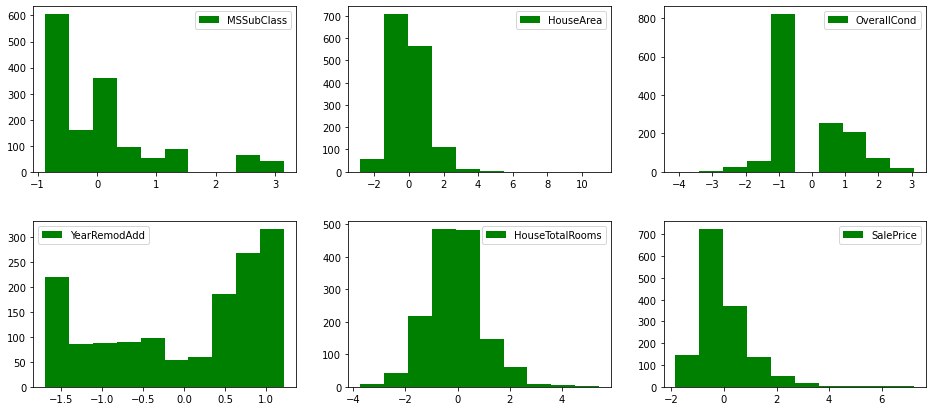

In [158]:
fig, ax = plt.subplots(2, 3, figsize=(16,7))

t = 0
trainDataT = (MyTrainingData-MyTrainingData.mean())/MyTrainingData.std()
for column in MyTrainingData:
    i = int(t/3)
    j = t%3
    ax[i][j].hist(trainDataT[column], label=column,color = "green")
    ax[i][j].legend(loc='best')
    t+=1

fig.subplots_adjust(hspace=0.3)
plt.savefig('variables.png', format='png')


Ahora debemos preparar de igual manera los datos de prueba:

In [159]:
# la suma de todas las áreas de la casa.
TestData['HouseTotalArea'] = TestData['1stFlrSF'] + TestData['2ndFlrSF'] + TestData.PoolArea + TestData.GarageArea + TestData.TotalBsmtSF

TestData['HouseTotalRooms'] = TestData.BedroomAbvGr + TestData.FullBath + TestData.KitchenAbvGr

# One-Hot Encoding
#Zone = pd.get_dummies(TestData.MSZoning, prefix='Zone')
#Utility = pd.get_dummies(TestData.Utilities, prefix='Utility')
#Neighborhood = pd.get_dummies(TestData.Neighborhood, prefix='Neighborhood')

MyTestData = pd.DataFrame(data= 
                              {
                                  'Id': TestData.Id,
                                  'MSSubClass':TestData.MSSubClass,
                                  'HouseArea':TestData.HouseTotalArea,
                                  'OverallCond': TestData.OverallCond,
                                  'YearRemodAdd': TestData.YearRemodAdd,
                                  'HouseTotalRooms': TestData.HouseTotalRooms
                              })

# Agregando las columnas de One-Hot Encoding.
#MyTestData = pd.concat([MyTestData, Zone, Utility, Neighborhood], axis=1)

# Se eliminan las columnas de One-Hot Encoding
# if "Zone_FV" in MyTestData :
#     MyTestData = MyTestData.drop(columns=['Zone_FV'])

# if "Zone_RM" in MyTestData :
#     MyTestData = MyTestData.drop(columns=['Zone_RM'])


In [160]:
#set(MyTrainingData.columns) - set(MyTestData.columns)

In [161]:
#Nos damos cuenta que los datos de pruebas no tienen ninguno categoría 'NoSeWa' luego el hot encoding 
# no crea la columna, es por es que debemos crear una columna de solo ceros expresando que ningún fila 
# contiene esa característica.

#MyTestData['Utility_NoSeWa'] = 0

Ya teniendo el conjunto de entrenamiento y el conjunto de pruebas podemos ajustar el modelo de regresión lineal multiple como sigue:

In [162]:
linear_model = LinearRegression(normalize=True)
linear_model.fit(MyTrainingData.loc[:, MyTrainingData.columns != 'SalePrice'],MyTrainingData['SalePrice'])

MyPredictData = {'Id':MyTestData.Id, 
                 'SalePrice': linear_model.predict(MyTestData.loc[:, MyTestData.columns != 'Id'])}
MyPredictData = pd.DataFrame(MyPredictData)

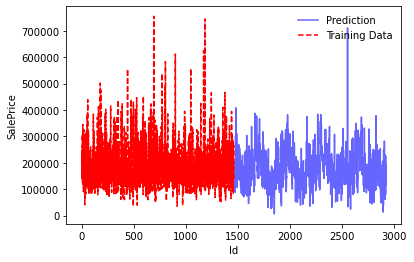

In [163]:
plt.plot(MyPredictData.Id, MyPredictData.SalePrice,'b',alpha=0.6, label='Prediction')
plt.plot(TrainingData.Id,TrainingData.SalePrice,'r--', label='Training Data')
plt.legend(loc='best', frameon=False)
plt.xlabel('Id')
plt.ylabel('SalePrice')
plt.savefig('Predicción.png', format='png')
plt.show()

Finalmente vemos los resultados de la predicción.